# Capstone project: Weather classification project  
<br>

## Table of content: 
* [EDA](#EDA)
    1. <a href="#EDA1">Check Class Balance </a>
      * <a href="#EDA1Z">Test run and view added dataset </a>
    2. <a href="#EDA2">Viewing sample of the Weather dataset  </a>
    

Overview: There's class imbalance issue, I will add around 400 images for rainbow, and 300 images for ligtning to make the data more balance. Class `rime` is downsampled. 
<br><br>
* [A. Model Selection](#A)
    1. <a href="#A1">Xception Model </a>
    2. <a href="#A2">VGG16 Model </a>
    3. <a href="#A3">EfficientNetB4  </a>
    4. <a href="#A4">InceptionResNetV2  </a>


Overview: `EfficientNetB4` performed exceptionally well among all the models, it is selected as the pretrained model for this study. 
<br><br>
* [B. Hyperparameter Tuning](#B)
    1. <a href="#B1">Learning Rate </a>
    2. <a href="#B2">Number of layers and dropout </a>
    3. <a href="#B3">Dense layer size </a>


Overview: Hyperparamters decision: `0.001` for learning rate. `0.5` for dropout. `100` for Dense layer size
<br><br>
* [C. Data Augmentation](#C)

Overview: Image augmentation lead to better convergence of training accuracy and validation accuracy. 
<br><br>
* [D. Final model Checkpointing](#D)
    

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet  import EfficientNetB4 

%matplotlib inline
tf.__version__

'2.6.0'

In [5]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    # DEFAULT PARAMS 
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    data_format=None,
    dtype=None,

    # PARAMS TO EXPLORE
    validation_split=0.3,
    zoom_range=0.0,
    preprocessing_function=None
)

In [6]:
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3387 images belonging to 8 classes.
Found 1447 images belonging to 8 classes.


In [4]:
train_ds.class_indices

{'fogsmog': 0,
 'hail': 1,
 'lightning': 2,
 'rain': 3,
 'rainbow': 4,
 'rime': 5,
 'sandstorm': 6,
 'snow': 7}

In [5]:
X, y = next(train_ds)

In [6]:
(X[:5]).shape

(5, 150, 150, 3)

# EDA <a class="anchor" id="EDA"></a>

Reference: https://medium.com/geekculture/eda-for-image-classification-dcada9f2567a
https://towardsdatascience.com/deep-learning-unbalanced-training-data-solve-it-like-this-6c528e9efea6

In [10]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img

### EDA-1. Checking class balance <a class="anchor" id="EDA1"></a>

In [126]:
dataset_dir = r"C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset"
all_classes = os.listdir(dataset_dir)

dataset_num_ofall_classes = {}
for XX in range(len(all_classes)): 
    dataset_num_ofall_classes[all_classes[XX]] = len(os.listdir(dataset_dir+ "\\"+ all_classes[XX]))

In [127]:
dataset_num_ofall_classes

{'fogsmog': 851,
 'hail': 591,
 'lightning': 377,
 'rain': 526,
 'rainbow': 232,
 'rime': 1160,
 'sandstorm': 692,
 'snow': 621}

<BarContainer object of 8 artists>

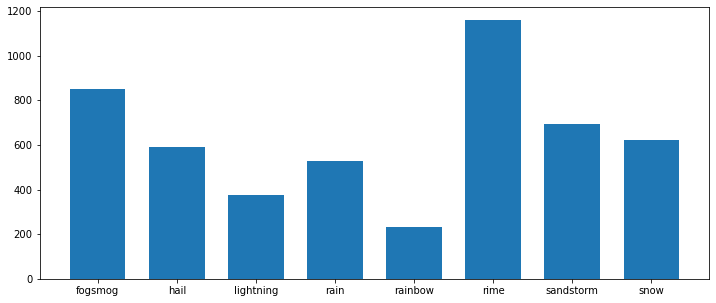

In [219]:
plt.figure(figsize=(12, 5))
plt.bar(dataset_num_ofall_classes.keys(), dataset_num_ofall_classes.values(), width= .7)

#As we can see rainbow and lightning are significantly lower than the other classes, 
#   fortunately, image of these 2 classes can be find easily on the itnernet.. 
#   I will add around 400 images for rainbow, and 300 images for ligtning
#   i will also downsample 

### Test run and view the added dataset: <a class="anchor" id="EDA1Z"></a>
Only added 50 for `lightning` and 100 for `rainbow`. 

Downloaded 300 images for rainbow, and 200 images for ligtning, after manual filtering only about 150 images are usable (some cannot be used due to picture format, so the actual usable images are even lesser). 

In [221]:
### LOAD DATASET 
load_added_img_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\Add',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

Found 102 images belonging to 2 classes.


In [228]:
add_classes = load_added_img_ds.class_indices
add_classes

{'lightning': 0, 'rainbow': 1}

In [224]:
add_dir = r"C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\Add"

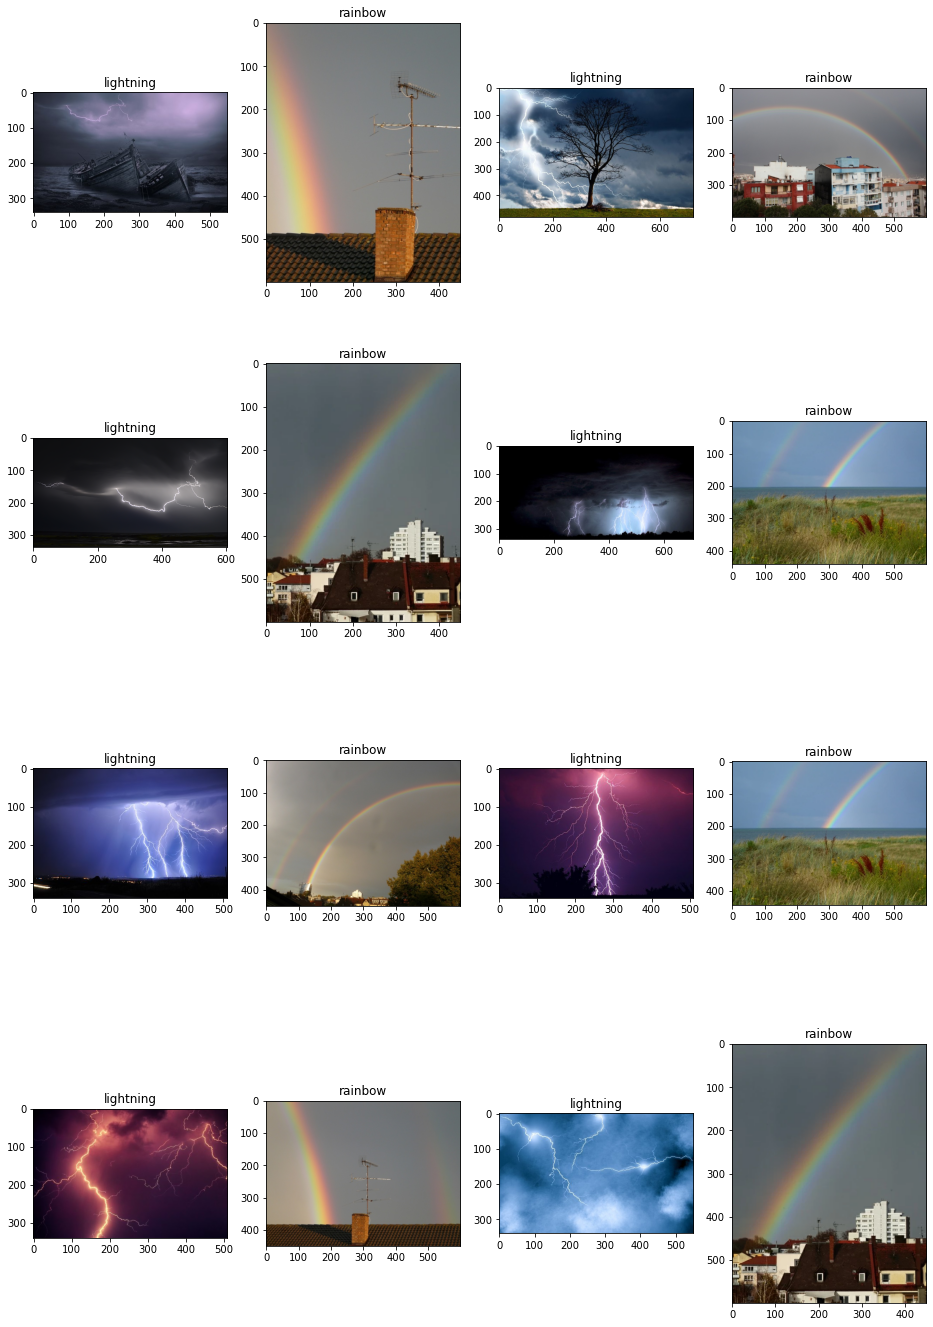

In [233]:
# Only added 50 and 100 to class `lightning` and `rainbow` 
fig, axs = plt.subplots (nrows = 4, ncols = 4, figsize=(16,24))

class_num = 0 
for XX, ax in enumerate(fig.axes): #32
    class_num = ( 1 if class_num==1 else 0 ) #set a condition so it wont go bigger than class size
    random_img = random.choice(os.listdir(add_dir+ "\\"+ list(add_classes)[class_num]))
    random_img_path = os.path.join(add_dir+ "\\" + list(add_classes)[class_num] + "\\" + random_img)
    ax.imshow(plt.imread(random_img_path))
    ax.set_title(list(add_classes)[class_num])
    class_num+=1

### EDA-2. Viewing sample of the Weather dataset <a class="anchor" id="EDA2"></a>

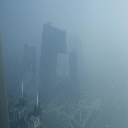

In [160]:
random_img = random.choice(os.listdir(dataset_dir+ "\\"+ all_classes[0]))
random_img_path = os.path.join(dataset_dir+ "\\" + all_classes[0] + "\\" + random_img)
load_img(random_img_path, target_size=(128,128))

In [197]:
all_classes

['fogsmog',
 'hail',
 'lightning',
 'rain',
 'rainbow',
 'rime',
 'sandstorm',
 'snow']

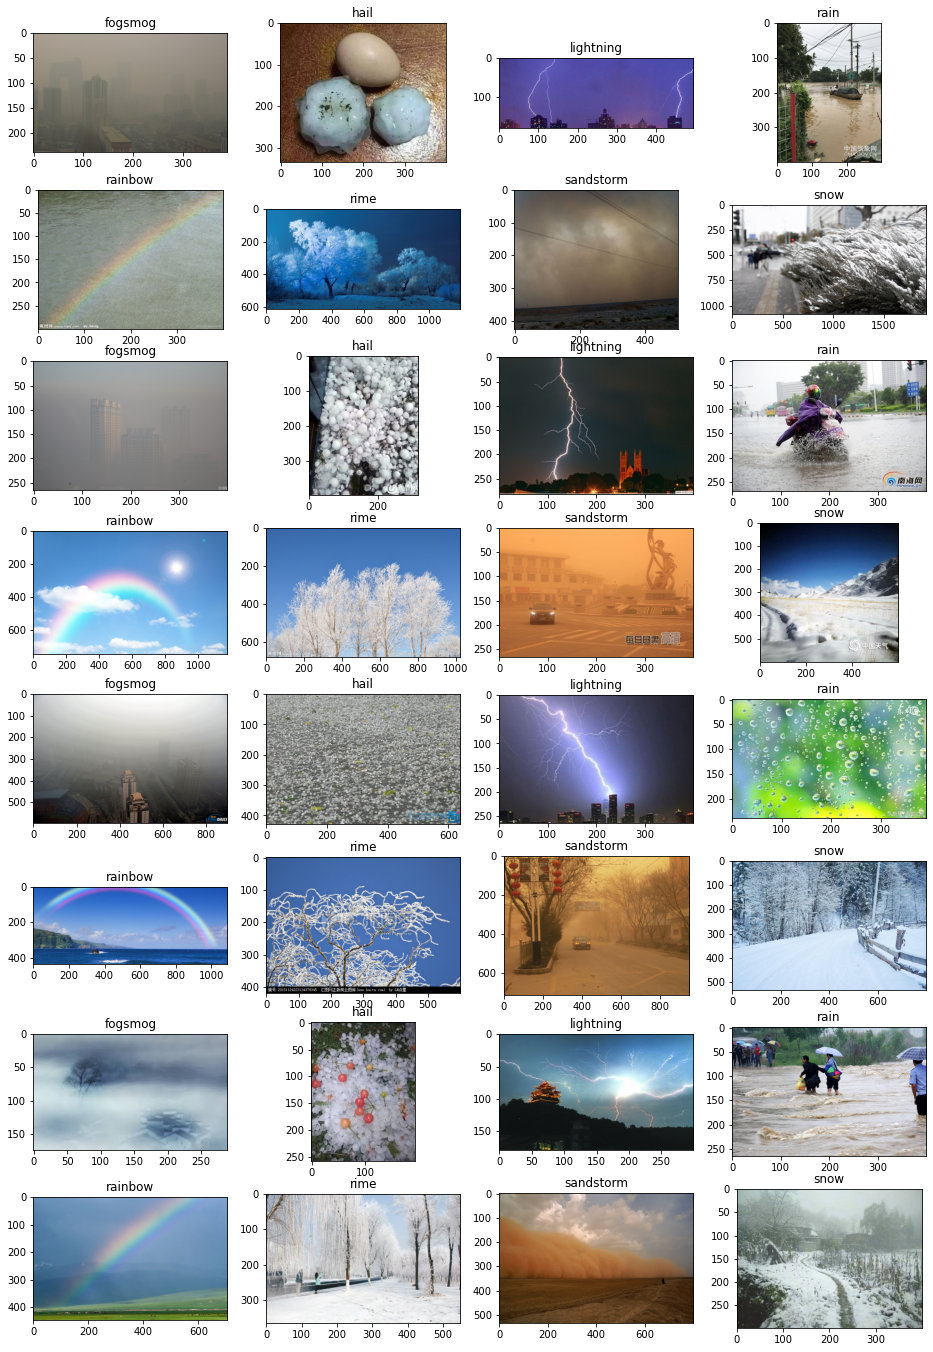

In [196]:
fig, axs = plt.subplots (nrows = 8, ncols = 4, figsize=(16,24))

class_num = 0 
for XX, ax in enumerate(fig.axes): #32
    class_num = ( 0 if class_num>7 else class_num ) #set a condition so it wont go bigger than class size
    random_img = random.choice(os.listdir(dataset_dir+ "\\"+ all_classes[class_num]))
    random_img_path = os.path.join(dataset_dir+ "\\" + all_classes[class_num] + "\\" + random_img)
    ax.imshow(plt.imread(random_img_path))
    ax.set_title(all_classes[class_num])
    class_num+=1

# A. Model Selection <a class="anchor" id="A"></a>

## A1. Xception Model <a class="anchor" id="A1"></a>


In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [ ]:
### LOAD DATASET 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

In [13]:
### Build model 
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
outputs = keras.layers.Dense(8,  activation='softmax')(vectors)
model = keras.Model(inputs, outputs)

In [14]:
### Compile model 
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])

In [15]:
### Train and fit the model 
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
111/111 [==============================] - 20s 166ms/step - loss: 6.6893 - accuracy: 0.4429 - val_loss: 2.9552 - val_accuracy: 0.5813
Epoch 2/10
111/111 [==============================] - 18s 162ms/step - loss: 3.0850 - accuracy: 0.5726 - val_loss: 2.6382 - val_accuracy: 0.6197
Epoch 3/10
111/111 [==============================] - 18s 161ms/step - loss: 2.7098 - accuracy: 0.6119 - val_loss: 2.2917 - val_accuracy: 0.6442
Epoch 4/10
111/111 [==============================] - 18s 163ms/step - loss: 2.0787 - accuracy: 0.6538 - val_loss: 2.4175 - val_accuracy: 0.6495
Epoch 5/10
111/111 [==============================] - 19s 167ms/step - loss: 1.8747 - accuracy: 0.6721 - val_loss: 2.4363 - val_accuracy: 0.6356
Epoch 6/10
111/111 [==============================] - 18s 162ms/step - loss: 1.7402 - accuracy: 0.6928 - val_loss: 2.0077 - val_accuracy: 0.6687
Epoch 7/10
111/111 [==============================] - 18s 162ms/step - loss: 1.7804 - accuracy: 0.7012 - val_loss: 1.9722 - val_ac

Text(0.5, 1.0, 'Training acc vs Validation acc')

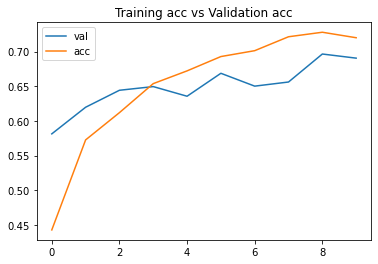

In [26]:
### Plot model performance 
plt.plot(history.history['val_accuracy'], label=('val'))
plt.plot(history.history['accuracy'], label=('acc'))
plt.legend()
plt.title('Training acc vs Validation acc')

#This model seems good, the train accuracy is quite near to validation accuracy. 

In [32]:
### ADD MORE LAYERS to the model 
base_model = Xception(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

base_model.trainable = False
inputs = keras.Input(shape=(150, 150, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(500, activation='relu')(vectors)
inner2 = keras.layers.Dense(250, activation='relu')(inner)
outputs = keras.layers.Dense(8,  activation='softmax')(inner2)
model = keras.Model(inputs, outputs)

In [33]:
### Compile the model 
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])

In [34]:
### Train and fit the model 
history = model.fit(train_ds, epochs=10, validation_data=val_ds)
#We can see obvious overfitting from Epoch 8 onwards 

Epoch 1/10
111/111 [==============================] - 21s 172ms/step - loss: 4.5260 - accuracy: 0.4963 - val_loss: 1.6921 - val_accuracy: 0.6204
Epoch 2/10
111/111 [==============================] - 18s 165ms/step - loss: 1.2789 - accuracy: 0.6164 - val_loss: 1.2144 - val_accuracy: 0.6257
Epoch 3/10
111/111 [==============================] - 18s 165ms/step - loss: 1.0463 - accuracy: 0.6620 - val_loss: 1.1871 - val_accuracy: 0.6283
Epoch 4/10
111/111 [==============================] - 19s 168ms/step - loss: 0.8791 - accuracy: 0.6990 - val_loss: 1.0177 - val_accuracy: 0.6567
Epoch 5/10
111/111 [==============================] - 19s 169ms/step - loss: 0.8750 - accuracy: 0.7015 - val_loss: 0.9921 - val_accuracy: 0.6832
Epoch 6/10
111/111 [==============================] - 18s 166ms/step - loss: 0.7508 - accuracy: 0.7518 - val_loss: 0.9272 - val_accuracy: 0.6885
Epoch 7/10
111/111 [==============================] - 18s 166ms/step - loss: 0.7174 - accuracy: 0.7561 - val_loss: 0.8845 - val_ac

Text(0.5, 1.0, 'Training acc vs Validation acc')

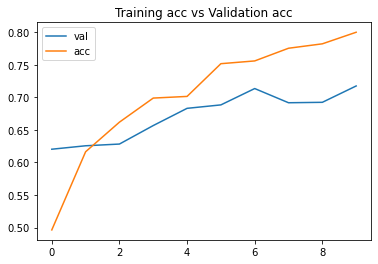

In [35]:
### PLOT the model performance 
plt.plot(history.history['val_accuracy'], label=('val'))
plt.plot(history.history['accuracy'], label=('acc'))
plt.legend()
plt.title('Training acc vs Validation acc')

## A2. VGG16 Model <a class="anchor" id="A2"></a>

In [36]:
### IMPORT MODULE
from tensorflow.keras.applications.vgg16 import VGG16

In [37]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3538 images belonging to 8 classes.
Found 1512 images belonging to 8 classes.


In [38]:
### BUILD and COMPILE MODEL
base_model= VGG16(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False

##################################################
inputs = keras.Input(shape=(224, 224, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
outputs = keras.layers.Dense(8, activation='softmax')(inner) 
model = keras.Model(inputs, outputs)
##################################################

optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)

In [39]:
history = model.fit(train_ds, epochs=10, validation_data = val_ds)

Epoch 1/10
111/111 [==============================] - 57s 434ms/step - loss: 1.1318 - accuracy: 0.6995 - val_loss: 0.6177 - val_accuracy: 0.7983
Epoch 2/10
111/111 [==============================] - 39s 349ms/step - loss: 0.3626 - accuracy: 0.8813 - val_loss: 0.4973 - val_accuracy: 0.8399
Epoch 3/10
111/111 [==============================] - 39s 351ms/step - loss: 0.2305 - accuracy: 0.9245 - val_loss: 0.4462 - val_accuracy: 0.8552
Epoch 4/10
111/111 [==============================] - 39s 352ms/step - loss: 0.1522 - accuracy: 0.9534 - val_loss: 0.4467 - val_accuracy: 0.8638
Epoch 5/10
111/111 [==============================] - 39s 353ms/step - loss: 0.1045 - accuracy: 0.9715 - val_loss: 0.4318 - val_accuracy: 0.8657
Epoch 6/10
111/111 [==============================] - 39s 354ms/step - loss: 0.0722 - accuracy: 0.9799 - val_loss: 0.4447 - val_accuracy: 0.8796
Epoch 7/10
111/111 [==============================] - 39s 353ms/step - loss: 0.0531 - accuracy: 0.9895 - val_loss: 0.4407 - val_ac

Text(0.5, 1.0, 'Train acc vs Val acc')

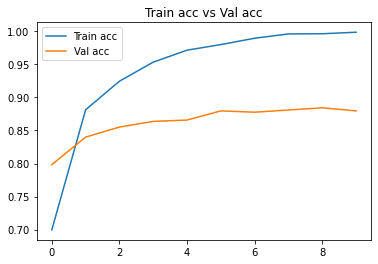

In [55]:
### PLOT THE MODEL EVALUATION 
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Train accuracy vs Val accuracy')

# This model outperformed previous model, though there's overfitting issue. 

## A3. EfficientNetB4 Model <a class="anchor" id="A3"></a>

In [43]:
### IMPORT MODULE
from tensorflow.keras.applications.efficientnet  import EfficientNetB4 

In [49]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3538 images belonging to 8 classes.
Found 1512 images belonging to 8 classes.


In [50]:
### BUILD AND COMPILE MODEL 
base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False

##################################################
inputs = keras.Input(shape=(224, 224, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
outputs = keras.layers.Dense(8, activation='softmax')(inner) 
model = keras.Model(inputs, outputs)
##################################################

optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)

In [48]:
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb4 (Functional)  (None, 7, 7, 1792)        17673823  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1792)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               179300    
_________________________________________________________________
dense_17 (Dense)             (None, 8)                 808       
Total params: 17,853,931
Trainable params: 180,108
Non-trainable params: 17,673,823
_________________________________________________________________


In [56]:
history = model.fit(train_ds, epochs=10, validation_data = val_ds)

Epoch 1/10
111/111 [==============================] - 63s 487ms/step - loss: 0.5926 - accuracy: 0.7925 - val_loss: 0.3780 - val_accuracy: 0.8611
Epoch 2/10
111/111 [==============================] - 49s 442ms/step - loss: 0.2442 - accuracy: 0.9186 - val_loss: 0.3106 - val_accuracy: 0.8869
Epoch 3/10
111/111 [==============================] - 49s 443ms/step - loss: 0.1595 - accuracy: 0.9517 - val_loss: 0.3058 - val_accuracy: 0.9001
Epoch 4/10
111/111 [==============================] - 49s 441ms/step - loss: 0.1081 - accuracy: 0.9700 - val_loss: 0.3066 - val_accuracy: 0.9001
Epoch 5/10
111/111 [==============================] - 47s 424ms/step - loss: 0.0720 - accuracy: 0.9847 - val_loss: 0.3261 - val_accuracy: 0.8915
Epoch 6/10
111/111 [==============================] - 47s 427ms/step - loss: 0.0526 - accuracy: 0.9907 - val_loss: 0.3234 - val_accuracy: 0.9034
Epoch 7/10
111/111 [==============================] - 47s 423ms/step - loss: 0.0429 - accuracy: 0.9904 - val_loss: 0.3343 - val_ac

Text(0.5, 1.0, 'Train accuracy vs Val accuracy')

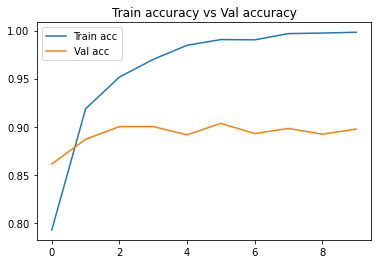

In [58]:
### PLOT THE MODEL EVALUATION 
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Train accuracy vs Val accuracy')

#This model performed really well but it clrealy overfits! 

## A4. InceptionResNetV2 Model <a class="anchor" id="A4"></a>

In [61]:
### IMPORT MODULE
from tensorflow.keras.applications  import InceptionResNetV2 

In [62]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3538 images belonging to 8 classes.
Found 1512 images belonging to 8 classes.


In [63]:
### BUILD AND COMPILE MODEL 
base_model= InceptionResNetV2(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False

##################################################
inputs = keras.Input(shape=(224, 224, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
outputs = keras.layers.Dense(8, activation='softmax')(inner) 
model = keras.Model(inputs, outputs)
##################################################

optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)

219070464/219055592 [==============================] - 9s 0us/step


In [64]:
history = model.fit(train_ds, epochs=10, validation_data = val_ds)

Epoch 1/10
111/111 [==============================] - 66s 502ms/step - loss: 84.0087 - accuracy: 0.1812 - val_loss: 2.0787 - val_accuracy: 0.1171
Epoch 2/10
111/111 [==============================] - 49s 443ms/step - loss: 2.0737 - accuracy: 0.1758 - val_loss: 2.0678 - val_accuracy: 0.2302
Epoch 3/10
111/111 [==============================] - 49s 445ms/step - loss: 2.0622 - accuracy: 0.2295 - val_loss: 2.0561 - val_accuracy: 0.2302
Epoch 4/10
111/111 [==============================] - 49s 445ms/step - loss: 2.0505 - accuracy: 0.2295 - val_loss: 2.0447 - val_accuracy: 0.2302
Epoch 5/10
111/111 [==============================] - 49s 445ms/step - loss: 2.0399 - accuracy: 0.2295 - val_loss: 2.0346 - val_accuracy: 0.2302
Epoch 6/10
111/111 [==============================] - 51s 458ms/step - loss: 2.0304 - accuracy: 0.2295 - val_loss: 2.0257 - val_accuracy: 0.2302
Epoch 7/10
111/111 [==============================] - 54s 486ms/step - loss: 2.0223 - accuracy: 0.2295 - val_loss: 2.0184 - val_a

Text(0.5, 1.0, 'Train accuracy vs Val accuracy')

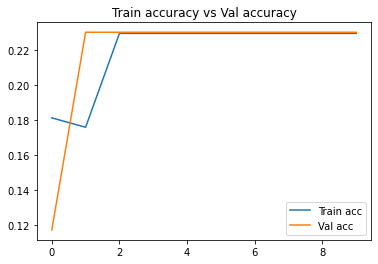

In [65]:
### PLOT THE MODEL EVALUATION 
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.legend()
plt.title('Train accuracy vs Val accuracy')

#Seems like the model is not configured properly, the accuracy is exceptionally low..

# B.Hypeparameter tuning<a class="anchor" id="B"></a>

## B1. Learning rate<a class="anchor" id="B1"></a>

In [235]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3387 images belonging to 8 classes.
Found 1447 images belonging to 8 classes.


In [236]:
def make_model(learning_rate = 0) :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
    outputs = keras.layers.Dense(8, activation='softmax')(inner) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    )
    
    return model 

In [237]:
scores = {}

for lr in [0.0001, 0.001, 0.005, 0.01, 0.1]:
    print(lr)
    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history
    print()
    print()

0.0001
Epoch 1/10
106/106 [==============================] - 60s 494ms/step - loss: 1.4980 - accuracy: 0.5338 - val_loss: 0.9417 - val_accuracy: 0.7685
Epoch 2/10
106/106 [==============================] - 47s 441ms/step - loss: 0.7763 - accuracy: 0.7927 - val_loss: 0.5949 - val_accuracy: 0.8341
Epoch 3/10
106/106 [==============================] - 47s 442ms/step - loss: 0.5546 - accuracy: 0.8403 - val_loss: 0.4857 - val_accuracy: 0.8514
Epoch 4/10
106/106 [==============================] - 47s 442ms/step - loss: 0.4520 - accuracy: 0.8680 - val_loss: 0.4314 - val_accuracy: 0.8680
Epoch 5/10
106/106 [==============================] - 47s 442ms/step - loss: 0.3890 - accuracy: 0.8851 - val_loss: 0.3984 - val_accuracy: 0.8721
Epoch 6/10
106/106 [==============================] - 47s 442ms/step - loss: 0.3450 - accuracy: 0.9011 - val_loss: 0.3735 - val_accuracy: 0.8742
Epoch 7/10
106/106 [==============================] - 47s 442ms/step - loss: 0.3107 - accuracy: 0.9108 - val_loss: 0.3586 -

(0.8, 1.0)

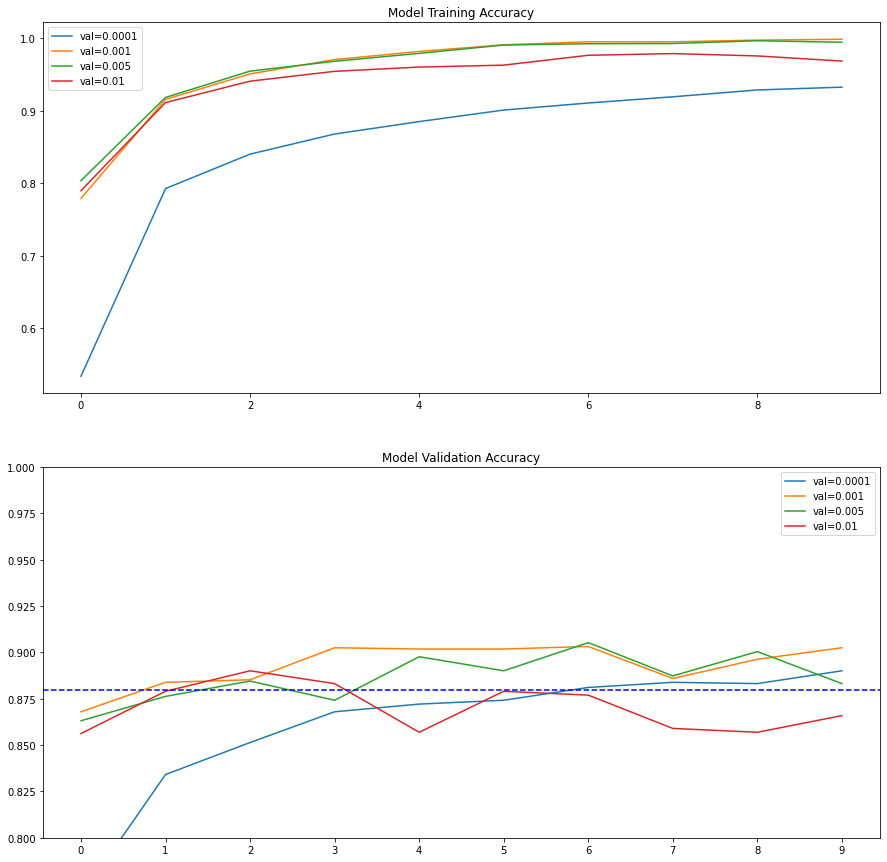

In [250]:
fig, axs = plt.subplots(2, figsize=(15,15))

for lr,hist in scores.items():
    if (lr!= 0.1): 
        axs[0].plot(hist['accuracy'], label = (f"val={lr}"))
        axs[1].plot(hist['val_accuracy'], label = (f"val={lr}"))

axs[0].title.set_text("Model Training Accuracy")
axs[0].legend()
#axs[0].set_xticks(np.arange(10)) 
axs[1].title.set_text("Model Validation Accuracy")
axs[1].legend()
axs[1].axhline(y=0.88, color='b', linestyle='--')
axs[1].set_xticks(np.arange(10)) 
plt.ylim(0.8, 1.0)

# 0.001 will be selected since most epochs performed greather than 0.88 

## B2. Number of layers and dropout <a class="anchor" id="B2"></a>

In [ ]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

In [239]:
### ADD MORE LAYERS to the model 
base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False
##################################################
inputs = keras.Input(shape=(224, 224, 3))
base = base_model(inputs, training=False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(500, activation='relu')(vectors)
inner2 = keras.layers.Dense(250, activation='relu')(inner)
outputs = keras.layers.Dense(8,  activation='softmax')(inner2)
model = keras.Model(inputs, outputs)
##################################################
optimizer = keras.optimizers.Adam()
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)

In [252]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
106/106 [==============================] - 57s 465ms/step - loss: 0.5679 - accuracy: 0.7983 - val_loss: 0.3556 - val_accuracy: 0.8784
Epoch 2/10
106/106 [==============================] - 47s 442ms/step - loss: 0.2070 - accuracy: 0.9259 - val_loss: 0.3731 - val_accuracy: 0.8839
Epoch 3/10
106/106 [==============================] - 47s 443ms/step - loss: 0.1149 - accuracy: 0.9607 - val_loss: 0.3948 - val_accuracy: 0.8708
Epoch 4/10
106/106 [==============================] - 47s 443ms/step - loss: 0.0780 - accuracy: 0.9734 - val_loss: 0.4162 - val_accuracy: 0.8846
Epoch 5/10
106/106 [==============================] - 47s 443ms/step - loss: 0.0402 - accuracy: 0.9888 - val_loss: 0.4524 - val_accuracy: 0.8908
Epoch 6/10
106/106 [==============================] - 47s 443ms/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.4535 - val_accuracy: 0.8853
Epoch 7/10
106/106 [==============================] - 47s 444ms/step - loss: 0.0274 - accuracy: 0.9920 - val_loss: 0.5461 - val_ac

There isnt much difference when second dense layer is added, thus I will stick to the previous model with one dense layer. 

In [262]:
# Add one layer of drop out 0.2
base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False
##################################################
inputs = keras.Input(shape=(224, 224, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
drop = keras.layers.Dropout(0.2)(inner)
outputs = keras.layers.Dense(8, activation='softmax')(drop) 
model = keras.Model(inputs, outputs)
##################################################
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)  

In [261]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
106/106 [==============================] - 58s 465ms/step - loss: 0.7146 - accuracy: 0.7547 - val_loss: 0.3693 - val_accuracy: 0.8708
Epoch 2/10
106/106 [==============================] - 47s 441ms/step - loss: 0.3164 - accuracy: 0.8863 - val_loss: 0.3455 - val_accuracy: 0.8839
Epoch 3/10
106/106 [==============================] - 47s 442ms/step - loss: 0.2168 - accuracy: 0.9333 - val_loss: 0.3059 - val_accuracy: 0.8943
Epoch 4/10
106/106 [==============================] - 47s 442ms/step - loss: 0.1553 - accuracy: 0.9531 - val_loss: 0.3064 - val_accuracy: 0.8963
Epoch 5/10
106/106 [==============================] - 47s 442ms/step - loss: 0.1186 - accuracy: 0.9678 - val_loss: 0.3264 - val_accuracy: 0.8936
Epoch 6/10
106/106 [==============================] - 47s 442ms/step - loss: 0.0910 - accuracy: 0.9782 - val_loss: 0.3105 - val_accuracy: 0.9053
Epoch 7/10
106/106 [==============================] - 47s 443ms/step - loss: 0.0688 - accuracy: 0.9852 - val_loss: 0.3386 - val_ac

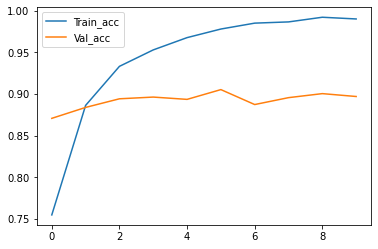

In [267]:
plt.plot(history.history['accuracy'], label = "Train_acc")
plt.plot(history.history['val_accuracy'], label = "Val_acc")
plt.legend()

In [268]:
# Add two layers of drop out 0.2
base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
base_model.trainable = False
##################################################
inputs = keras.Input(shape=(224, 224, 3))   
base = base_model(inputs, training= False)
vectors = keras.layers.GlobalAveragePooling2D()(base)
drop1 = keras.layers.Dropout(0.2)(vectors)
inner = keras.layers.Dense(100, activation= 'relu')(drop1) 
drop2 = keras.layers.Dropout(0.2)(inner)
outputs = keras.layers.Dense(8, activation='softmax')(drop2) 
model = keras.Model(inputs, outputs)
##################################################
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = keras.losses.CategoricalCrossentropy()
model.compile(
    optimizer=optimizer, 
    loss = loss, 
    metrics=['accuracy']
)  

In [269]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
106/106 [==============================] - 56s 459ms/step - loss: 0.7171 - accuracy: 0.7526 - val_loss: 0.3795 - val_accuracy: 0.8770
Epoch 2/10
106/106 [==============================] - 47s 442ms/step - loss: 0.3401 - accuracy: 0.8843 - val_loss: 0.3566 - val_accuracy: 0.8798
Epoch 3/10
106/106 [==============================] - 47s 443ms/step - loss: 0.2472 - accuracy: 0.9182 - val_loss: 0.3370 - val_accuracy: 0.8825
Epoch 4/10
106/106 [==============================] - 47s 443ms/step - loss: 0.2025 - accuracy: 0.9312 - val_loss: 0.3059 - val_accuracy: 0.8984
Epoch 5/10
106/106 [==============================] - 47s 443ms/step - loss: 0.1629 - accuracy: 0.9454 - val_loss: 0.3214 - val_accuracy: 0.9019
Epoch 6/10
106/106 [==============================] - 47s 443ms/step - loss: 0.1405 - accuracy: 0.9560 - val_loss: 0.3178 - val_accuracy: 0.8991
Epoch 7/10
106/106 [==============================] - 47s 444ms/step - loss: 0.1114 - accuracy: 0.9658 - val_loss: 0.3139 - val_ac

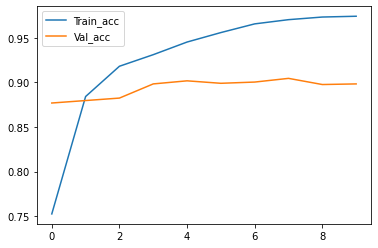

In [270]:
plt.plot(history.history['accuracy'], label = "Train_acc")
plt.plot(history.history['val_accuracy'], label = "Val_acc")
plt.legend()

In [283]:
# Tune dropout 
def make_model(dropout=0.1) :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    drop1 = keras.layers.Dropout(dropout)(vectors)
    inner = keras.layers.Dense(100, activation= 'relu')(drop1) 
    drop2 = keras.layers.Dropout(dropout)(inner)
    outputs = keras.layers.Dense(8, activation='softmax')(drop2) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    ) 
    return model 

In [284]:
scores = {}

for do in [0.3,0.5, 0.6]:
    print(do)
    model = make_model(dropout=do)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[do] = history.history
    print("=========================================================")
    print()

0.3
Epoch 1/10
106/106 [==============================] - 57s 463ms/step - loss: 0.8096 - accuracy: 0.7204 - val_loss: 0.3840 - val_accuracy: 0.8708
Epoch 2/10
106/106 [==============================] - 47s 442ms/step - loss: 0.4032 - accuracy: 0.8550 - val_loss: 0.3586 - val_accuracy: 0.8742
Epoch 3/10
106/106 [==============================] - 47s 443ms/step - loss: 0.3111 - accuracy: 0.8905 - val_loss: 0.3308 - val_accuracy: 0.8922
Epoch 4/10
106/106 [==============================] - 47s 443ms/step - loss: 0.2579 - accuracy: 0.9170 - val_loss: 0.2934 - val_accuracy: 0.8936
Epoch 5/10
106/106 [==============================] - 47s 443ms/step - loss: 0.2196 - accuracy: 0.9250 - val_loss: 0.2974 - val_accuracy: 0.8956
Epoch 6/10
106/106 [==============================] - 47s 443ms/step - loss: 0.1867 - accuracy: 0.9380 - val_loss: 0.3119 - val_accuracy: 0.8943
Epoch 7/10
106/106 [==============================] - 47s 444ms/step - loss: 0.1687 - accuracy: 0.9460 - val_loss: 0.3023 - va

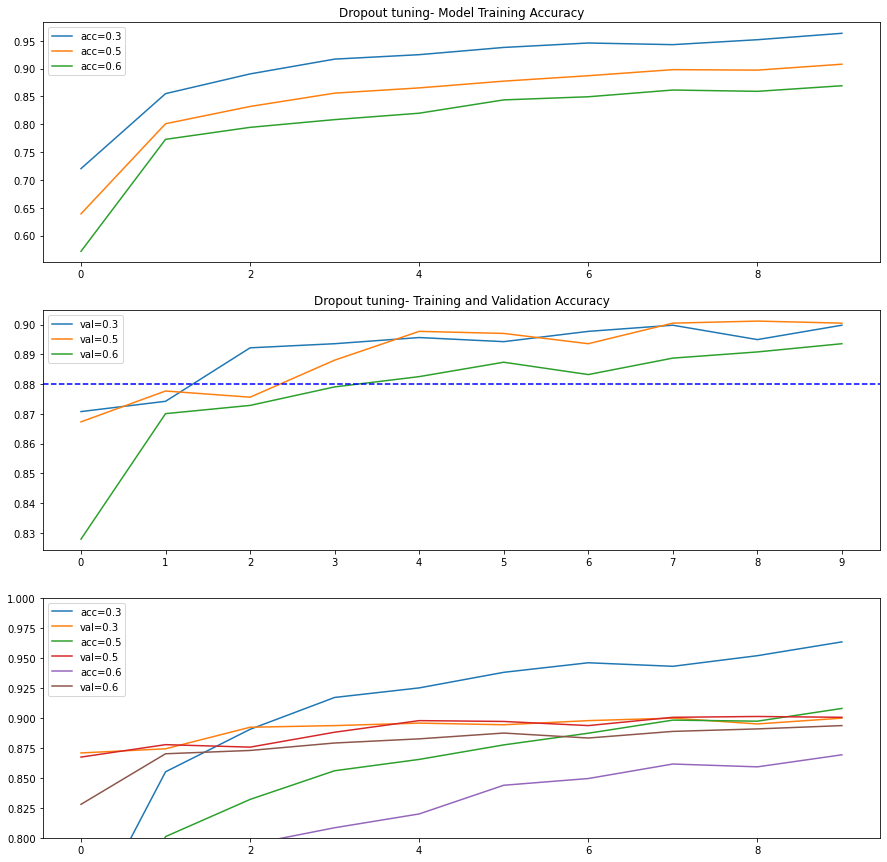

In [292]:
fig, axs = plt.subplots(3, figsize=(15,15))

for lr,hist in scores.items():
    axs[0].plot(hist['accuracy'], label = (f"acc={lr}"))
    axs[1].plot(hist['val_accuracy'], label = (f"val={lr}"))
    axs[2].plot(hist['accuracy'],label = (f"acc={lr}") )
    axs[2].plot(hist['val_accuracy'], label = (f"val={lr}"))

axs[0].title.set_text("Dropout tuning- Model Training Accuracy")
axs[0].legend()
#axs[0].set_xticks(np.arange(10)) 
axs[1].title.set_text("Dropout tuning- Model Validation Accuracy")
axs[1].legend()
axs[1].axhline(y=0.88, color='b', linestyle='--')
axs[1].set_xticks(np.arange(10)) 
plt.ylim(0.8, 1.0)

axs[1].title.set_text("Dropout tuning- Training and Validation Accuracy")
axs[2].legend()

# 0.5 dropout seems good, the model didnt really overfit much in this case, and converged well with val_accuracy

Adding regularizer (code below) didnt work, due to `ResourceExhaustedError:  OOM ` prob casued by my environment, it's worth exploring tho.

In [256]:
# Adding regularizer to the network! 
# Reference: https://sthalles.github.io/keras-regularizer/ 
def make_model() :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = True
    # adding regularization
    regularizer = tf.keras.regularizers.l2(0.1)

    for layer in base_model.layers:
        for attr in ['kernel_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(100, activation= 'relu')(vectors) 
    outputs = keras.layers.Dense(8, activation='softmax')(inner) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    )


    return model 

In [258]:
model = make_model()
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[32,144,112,112] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node model_22/efficientnetb4/block2a_expand_bn/FusedBatchNormV3 (defined at \AppData\Local\Temp/ipykernel_7344/1020983675.py:2) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_567001]

Function call stack:
train_function


# B3. Tune dense layer size  <a class="anchor" id="B3"></a>

In [7]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3387 images belonging to 8 classes.
Found 1447 images belonging to 8 classes.


In [12]:
# Tune dense layer size  
def make_model(size=10) :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    drop1 = keras.layers.Dropout(0.5)(vectors)
    inner = keras.layers.Dense(size, activation= 'relu')(drop1) 
    drop2 = keras.layers.Dropout(0.5)(inner)
    outputs = keras.layers.Dense(8, activation='softmax')(drop2) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    ) 
    return model 

In [13]:
scores = {}

for size in [50,100, 150, 300, 500]:
    print(size)
    model = make_model(size=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history
    print()
    print()

50
Epoch 1/10
106/106 [==============================] - 71s 517ms/step - loss: 1.2189 - accuracy: 0.5743 - val_loss: 0.5253 - val_accuracy: 0.8376
Epoch 2/10
106/106 [==============================] - 51s 484ms/step - loss: 0.7039 - accuracy: 0.7620 - val_loss: 0.4125 - val_accuracy: 0.8652
Epoch 3/10
106/106 [==============================] - 51s 481ms/step - loss: 0.5764 - accuracy: 0.8051 - val_loss: 0.3733 - val_accuracy: 0.8715
Epoch 4/10
106/106 [==============================] - 49s 463ms/step - loss: 0.5069 - accuracy: 0.8243 - val_loss: 0.3487 - val_accuracy: 0.8804
Epoch 5/10
106/106 [==============================] - 49s 462ms/step - loss: 0.4721 - accuracy: 0.8379 - val_loss: 0.3295 - val_accuracy: 0.8804
Epoch 6/10
106/106 [==============================] - 49s 463ms/step - loss: 0.4396 - accuracy: 0.8468 - val_loss: 0.3222 - val_accuracy: 0.8929
Epoch 7/10
106/106 [==============================] - 49s 464ms/step - loss: 0.4010 - accuracy: 0.8663 - val_loss: 0.3193 - val

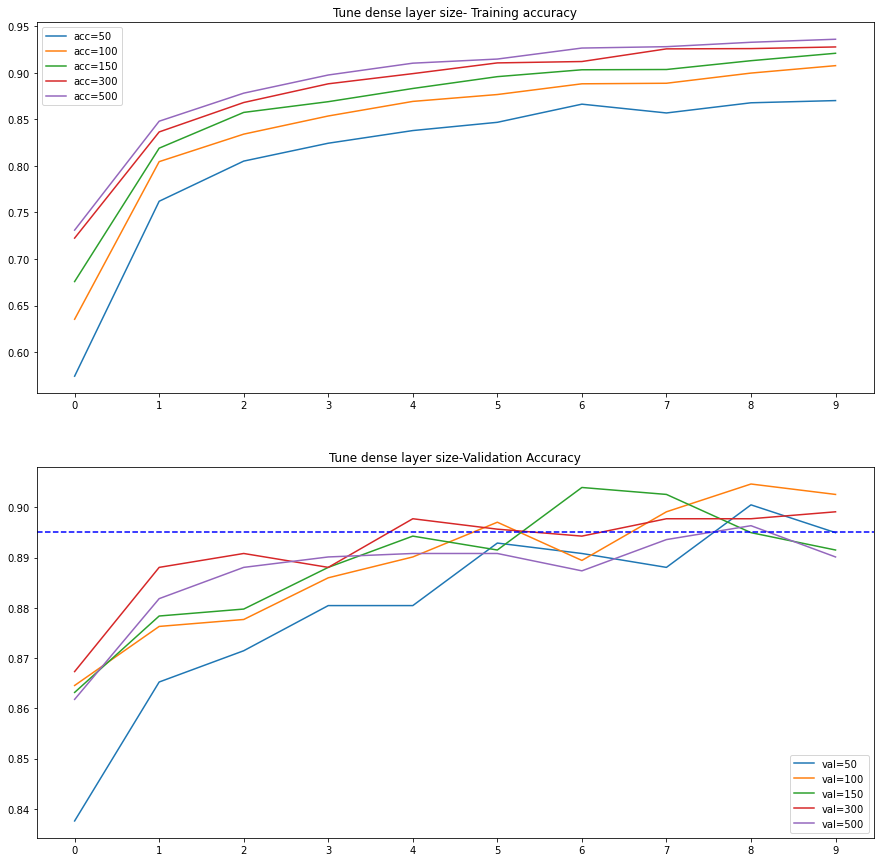

In [22]:
fig, axs = plt.subplots(2, figsize=(15,15))

for lr,hist in scores.items():
    axs[0].plot(hist['accuracy'], label = (f"acc={lr}"))
    axs[1].plot(hist['val_accuracy'], label = (f"val={lr}"))


axs[0].title.set_text("Tune dense layer size- Training accuracy")
axs[0].legend()
axs[0].set_xticks(np.arange(10)) 

axs[1].title.set_text("Tune dense layer size-Validation Accuracy")
axs[1].legend()
axs[1].set_xticks(np.arange(10)) 
axs[1].axhline(y=0.895, color='b', linestyle='--')
# Dense layer size 100 will be used for the final model

# C. Data augmentation  <a class="anchor" id="C"></a>

Ref: https://www.pyimagesearch.com/2019/07/08/keras-imagedatagenerator-and-data-augmentation/ 

Keras actually replace the orginal batch of images with the new, randomly transformed batch. 

In [8]:
train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    # DEFAULT PARAMS 
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06,
    brightness_range=None,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    vertical_flip=False,
    rescale=None,
    data_format=None,
    dtype=None,

    # PARAMS TO EXPLORE
    horizontal_flip=True,
    shear_range=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.3,
    zoom_range=0.2,
    preprocessing_function=None
)

In [9]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3387 images belonging to 8 classes.
Found 1447 images belonging to 8 classes.


In [10]:
# Final model  
def make_model() :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    drop1 = keras.layers.Dropout(0.5)(vectors)
    inner = keras.layers.Dense(100, activation= 'relu')(drop1) 
    drop2 = keras.layers.Dropout(0.5)(inner)
    outputs = keras.layers.Dense(8, activation='softmax')(drop2) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    ) 
    return model 

In [12]:
model = make_model()
history = model.fit(train_ds, epochs=10, validation_data = val_ds)

Epoch 1/10
106/106 [==============================] - 77s 565ms/step - loss: 1.0912 - accuracy: 0.6147 - val_loss: 0.5069 - val_accuracy: 0.8334
Epoch 2/10
106/106 [==============================] - 49s 460ms/step - loss: 0.6600 - accuracy: 0.7697 - val_loss: 0.4276 - val_accuracy: 0.8493
Epoch 3/10
106/106 [==============================] - 49s 462ms/step - loss: 0.5703 - accuracy: 0.8019 - val_loss: 0.3931 - val_accuracy: 0.8632
Epoch 4/10
106/106 [==============================] - 50s 467ms/step - loss: 0.5212 - accuracy: 0.8169 - val_loss: 0.3829 - val_accuracy: 0.8632
Epoch 5/10
106/106 [==============================] - 50s 471ms/step - loss: 0.4824 - accuracy: 0.8291 - val_loss: 0.3571 - val_accuracy: 0.8721
Epoch 6/10
106/106 [==============================] - 50s 467ms/step - loss: 0.4619 - accuracy: 0.8329 - val_loss: 0.3596 - val_accuracy: 0.8708
Epoch 7/10
106/106 [==============================] - 50s 468ms/step - loss: 0.4448 - accuracy: 0.8412 - val_loss: 0.3275 - val_ac

# D. Final model checkpointing <a class="anchor" id="D"></a>

In [13]:
 train_datagen= tf.keras.preprocessing.image.ImageDataGenerator(
    # DEFAULT PARAMS 
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False, 
    zca_epsilon=1e-06,
    brightness_range=None,
    channel_shift_range=0.0,
    fill_mode='nearest',
    cval=0.0,
    vertical_flip=False,
    rescale=None,
    data_format=None,
    dtype=None,

    # PARAMS TO EXPLORE
    horizontal_flip=True,
    shear_range=0.15,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.3,
    zoom_range=0.2,
    preprocessing_function=None
)

In [14]:
### LOAD DATA 
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training') # set as training data

val_ds = train_datagen.flow_from_directory(
    r'C:\Users\User\@Code-ML\Zoom-camp Capstone Project\Data\dataset', # same directory as training data
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 3387 images belonging to 8 classes.
Found 1447 images belonging to 8 classes.


In [16]:
# Final model  
def make_model() :
    base_model= EfficientNetB4(weights='imagenet', include_top= False, input_shape=(224, 224, 3))
    base_model.trainable = False
    ##################################################
    inputs = keras.Input(shape=(224, 224, 3))   
    base = base_model(inputs, training= False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    drop1 = keras.layers.Dropout(0.5)(vectors)
    inner = keras.layers.Dense(100, activation= 'relu')(drop1) 
    drop2 = keras.layers.Dropout(0.5)(inner)
    outputs = keras.layers.Dense(8, activation='softmax')(drop2) 
    model = keras.Model(inputs, outputs)
    ##################################################
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss = keras.losses.CategoricalCrossentropy()
    model.compile(
        optimizer=optimizer, 
        loss = loss, 
        metrics=['accuracy']
    ) 
    return model 

In [17]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'EfficientNetB4_Epoch-{epoch:02d}_Val-acc-{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [18]:
# Latest model (with augmentation)
model = make_model()

history = model.fit(
    train_ds,
    epochs=50,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/50
106/106 [==============================] - 60s 492ms/step - loss: 1.0994 - accuracy: 0.6159 - val_loss: 0.5099 - val_accuracy: 0.8293
Epoch 2/50
106/106 [==============================] - 49s 461ms/step - loss: 0.6433 - accuracy: 0.7724 - val_loss: 0.4229 - val_accuracy: 0.8500
Epoch 3/50
106/106 [==============================] - 49s 463ms/step - loss: 0.5429 - accuracy: 0.8122 - val_loss: 0.3970 - val_accuracy: 0.8576
Epoch 4/50
106/106 [==============================] - 49s 464ms/step - loss: 0.4952 - accuracy: 0.8273 - val_loss: 0.3881 - val_accuracy: 0.8680
Epoch 5/50
106/106 [==============================] - 50s 470ms/step - loss: 0.4789 - accuracy: 0.8364 - val_loss: 0.3671 - val_accuracy: 0.8853
Epoch 6/50
106/106 [==============================] - 51s 482ms/step - loss: 0.4664 - accuracy: 0.8415 - val_loss: 0.3597 - val_accuracy: 0.8687
Epoch 7/50
106/106 [==============================] - 49s 464ms/step - loss: 0.4492 - accuracy: 0.8308 - val_loss: 0.3512 - val_ac

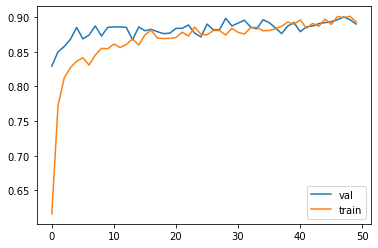

In [19]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()

In [27]:
# FIRST MODEL (without augmentation)
model = make_model()

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

Epoch 1/30
106/106 [==============================] - 58s 468ms/step - loss: 0.9723 - accuracy: 0.6566 - val_loss: 0.4235 - val_accuracy: 0.8590
Epoch 2/30
106/106 [==============================] - 48s 451ms/step - loss: 0.5380 - accuracy: 0.8122 - val_loss: 0.3610 - val_accuracy: 0.8777
Epoch 3/30
106/106 [==============================] - 47s 440ms/step - loss: 0.4409 - accuracy: 0.8394 - val_loss: 0.3257 - val_accuracy: 0.8853
Epoch 4/30
106/106 [==============================] - 47s 449ms/step - loss: 0.4052 - accuracy: 0.8562 - val_loss: 0.3244 - val_accuracy: 0.8825
Epoch 5/30
106/106 [==============================] - 47s 448ms/step - loss: 0.3647 - accuracy: 0.8633 - val_loss: 0.3319 - val_accuracy: 0.8728
Epoch 6/30
106/106 [==============================] - 47s 442ms/step - loss: 0.3350 - accuracy: 0.8869 - val_loss: 0.3080 - val_accuracy: 0.8977
Epoch 7/30
106/106 [==============================] - 51s 487ms/step - loss: 0.3008 - accuracy: 0.8931 - val_loss: 0.3090 - val_ac

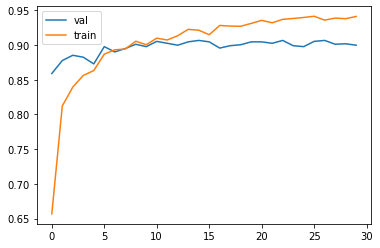

In [28]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()